# Эмпирическая функция распределения

## Цель работы:

- ознакомится с методами и результатами оценивания функции при помощи расстояний Колмогорова и Смирнова
- ознакомится теоретически и практически с построением доверительной полосы
- научить использовать критерий согласия и исследовать их свойства при конечном $n$

## Задание и цель работы

Для случайной величины, распределенной по нормальному закону с параметрами $(a, \sigma^2)$, выполнить следующие действия:

- Задать параметры распределения $X$ ~ $N(a, \sigma^2)$
- Построить график $F_X(x)$, используя функцию $normcdf$
- При $n = 100$ построить выборку из генеральной совокупности $X$
- По построенной выборке построить график эмпирической функции распределения $F_n(x)$, используя при построении встроенную функцию $[a, b] = stairs(x, y)$ для построения кусочно-постоянной функции. Учесть при построении, что $F_n(x)$ измеряется для $1/n$ в каждой следующей точке выборки
- Построить доверительную полосу надежности $\gamma = 0.95, u(\gamma) = 1.36$
- На этом же графике построить $F_n(x)$ и $F_X(x)$. Убедиться, что функция распределения попадает в доверительную полосу.
- На основе критерия Колмогорова и на основе критерия Смирнова провести проверку гипотез согласия с фиксированной функцией распределения при $n = 10^4$ и $n = 10^6$
- Оценить ошибки I и II рода каждого из критериев

Аналогично для $X$ ~ $U(a, b)$ равномерно распределенной на $[a, b]$ случайной величины

In [1]:
clc
clear -all
pkg load statistics
pkg load econometrics
graphics_toolkit('gnuplot')


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.


In [2]:
global alp = 0;
global sig = 5;
global n = 100;
global u = 1.36;
global gam = 0.95;
global figure_number = 1;

function normal_distribution()
    global alp sig n u gam figure_number
    x = sort(normrnd(alp, sig, 1, n));
    y = [1 / n : 1 / n : 1];
    [a, b] = stairs(x, y);

    Fmin = max(0, b - u / sqrt(n));
    Fmax = min(1, b + u / sqrt(n));

    x0 = [min(x) : 0.01 : max(x)];
    Fx = normcdf(x0, alp, sig);
    
    f = figure(figure_number++, "position", get(0, "screensize"));
    area(a, Fmax, 'FaceAlpha', 0.08, 'EdgeColor', 'white');
    hold on
    area(a, Fmin, 'FaceColor', 'white', 'EdgeColor', 'white')
    plot(x0, Fx, a, b, a, Fmin, a, Fmax)
    plot_name = strcat("N(", num2str(alp), ", ", num2str(sig ** 2), ") gamma=", num2str(gam));
    title(plot_name)
    pause(0.01)
    hold off
end

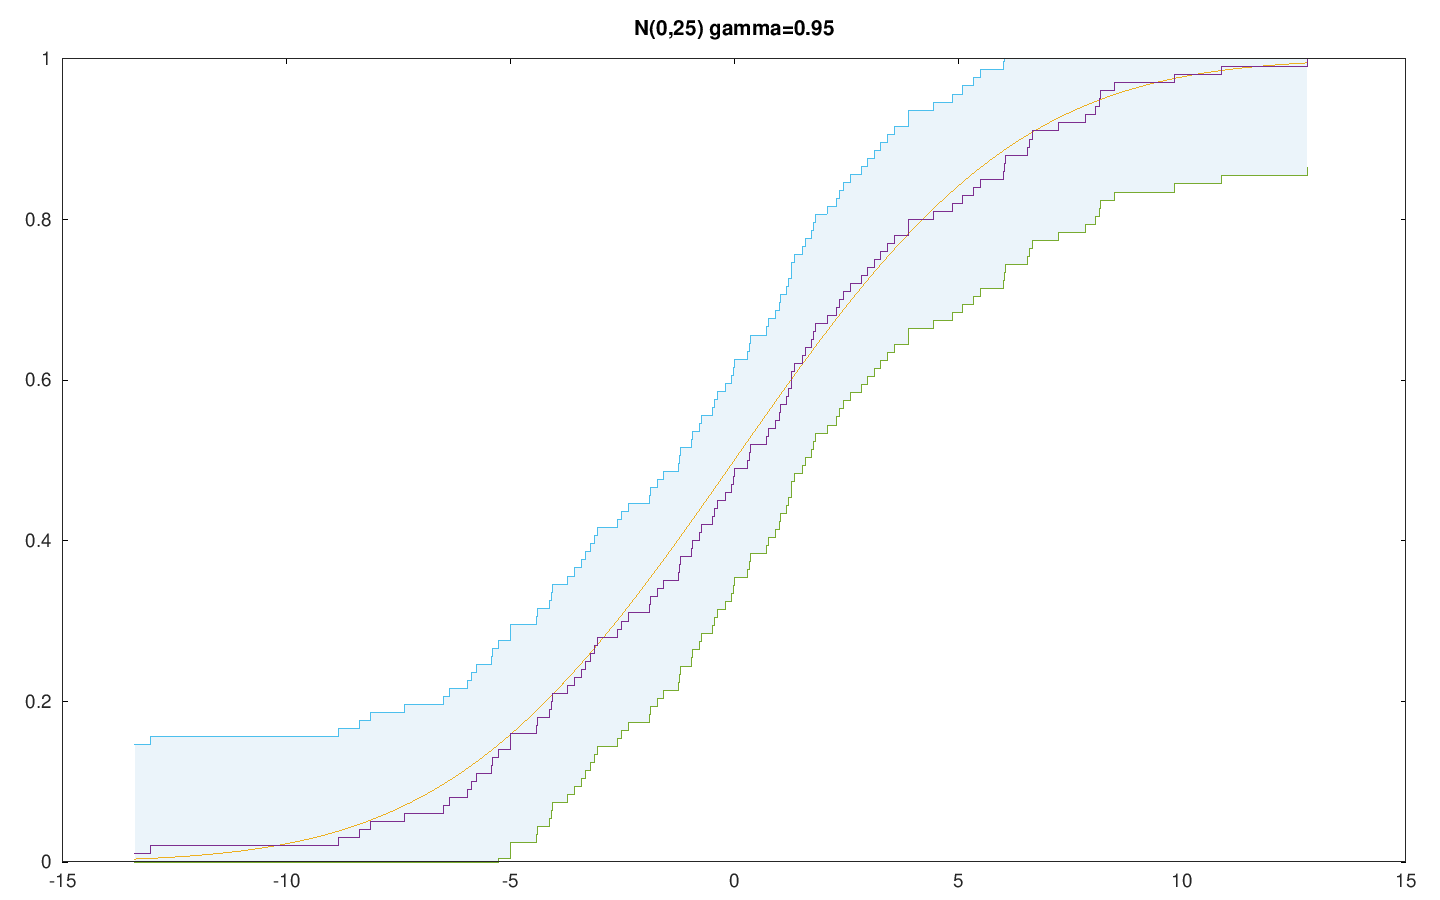

In [3]:
normal_distribution()

In [4]:
global l = 0
global r = 5

function uniform_distribution()
    global l r n u gam figure_number
    x = sort(unifrnd(l, r, 1, n));
    y = [1 / n : 1 / n : 1];
    [a, b] = stairs(x, y);
    
    Fmin = max(0, b - u / sqrt(n));
    Fmax = min(1, b + u / sqrt(n));
    
    x0 = [min(x) : 0.01 : max(x)];
    Fx = unifcdf(x0, l, r);
    
    f = figure(figure_number++, "position", get(0, "screensize"));
    area(a, Fmax, 'FaceAlpha', 0.08, 'EdgeColor', 'white');
    hold on
    area(a, Fmin, 'FaceColor', 'white', 'EdgeColor', 'white')
    plot(x0, Fx, a, b, a, Fmin, a, Fmax)
    plot_name = strcat("U(", num2str(l), ", ", num2str(r), ") gamma=", num2str(gam));
    title(plot_name)  
    pause(0.01)
    hold off
end

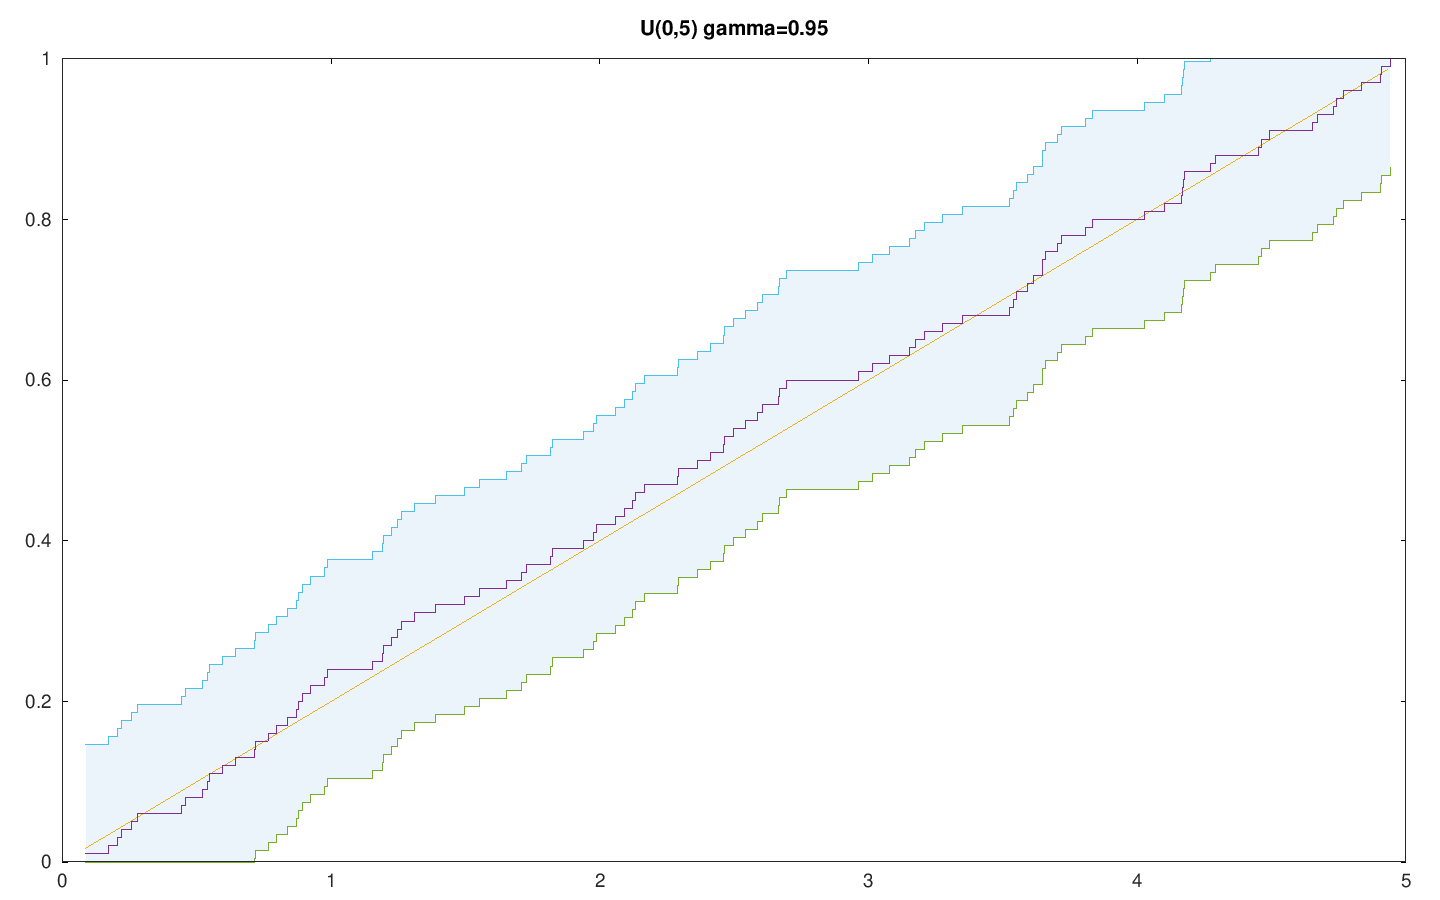

In [5]:
uniform_distribution()

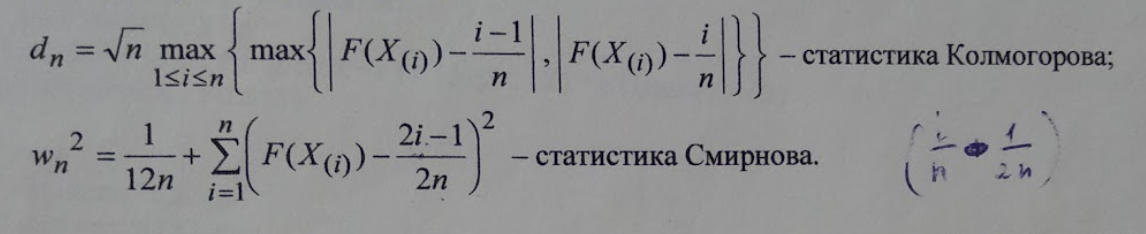

In [6]:
% d - Kolmogorov statistics
% w - Smirnov statistics

function [d, w] = criteries(Fx, n)
    i = [1 : 1 : n];
    d = sqrt(n) * max(max(abs(Fx(i) - (i - 1) / n), max(abs(Fx(i) - i / n))));
    w = 1 / (12 * n) + sum((Fx(i) - (2 * i - 1) / (2 * n)) .^ 2);
end

In [7]:
function [d, w] = normal_criteries(n, shift=0)
    global alp sig
    x = sort(normrnd(alp, sig, 1, n));
    Fx = normcdf(x, alp + shift, sig);
    [d, w] = criteries(Fx, n);
end

In [8]:
function [d, w] = uniform_criteries(n, shift=0)
    global l r
    x = sort(unifrnd(l, r, 1, n));
    Fx = unifcdf(x, l + shift, r);
    [d, w] = criteries(Fx, n);
end

In [9]:
function analyse_criteries
    [nc, uc, ns] = deal([], [], []);
    for n = [10^4, 10^6]
        ns = [ns; n];
        [d1, w1] = normal_criteries(n);
        nc = [nc; d1, w1];
        [d2, w2] = uniform_criteries(n);
        uc = [uc; d2, w2];
    end
    prettyprint_c([ns, nc, uc], ['n'; 'dnorm'; 'wnorm'; 'dunif'; 'wunif'])
end

In [10]:
analyse_criteries()

         n     dnorm     wnorm     dunif     wunif  
  10000.000     1.014     0.272     1.195     0.313
  1000000.000     0.867     0.101     0.529     0.022


In [11]:
% dn - Kolmogorov quantile
% wn - Smirnov quantile

% for \gamma = 0.95
global dn = 1.358;
global wn = 0.46;

function gam = update_quantiles(gamma)
    global dn wn gam
    if any([0.9, 0.95, 0.99] == gamma)
        gam = gamma;
    end
    
    if gamma == 0.9
        dn = 1.224;
        wn = 0.35;
    elseif gamma == 0.95
        dn = 1.358;
        wn = 0.46;
    elseif gamma == 0.99
        dn = 1.628;
        wn = 0.84;
    end
end

In [12]:
% Type I error
function [d_prob, w_prob] = false_positive_error(n, m, critery)
    global dn wn
    [d_cnt, w_cnt] = deal(0, 0);
    for i = 1 : m
        [d, w] = critery(n);
        d_cnt += (d >= dn);
        w_cnt += (w >= wn);
    end
    d_prob = d_cnt / m;
    w_prob = w_cnt / m;
end

% Type II error
function [d_prob, w_prob] = false_negative_error(n, m, critery)
    global alp l dn wn
    [d_cnt, w_cnt] = deal(0, 0);
    for i = 1 : m
        [d, w] = critery(n, shift=0.1);
        d_cnt += (d < dn);
        w_cnt += (w < wn);
    end
    d_prob = d_cnt / m;
    w_prob = w_cnt / m;
end

In [13]:
function analyse_errors(n, m, error_type)
    [nc, uc, gs] = deal([], [], []);
    for g = [0.9, 0.95, 0.99]
        gs = [gs; update_quantiles(g)];
        [d1, w1] = error_type(n, m, @normal_criteries);
        nc = [nc; d1, w1];
        [d2, w2] = error_type(n, m, @uniform_criteries);
        uc = [uc; d2, w2];
    end
    printf('\n n = %d, m = %d\n', n, m)
    prettyprint_c([gs, nc, uc], ['gamma'; 'dnorm'; 'wnorm'; 'dunif'; 'wunif']);
end

In [14]:
analyse_errors(10^4, 100, @false_positive_error);


 n = 10000, m = 100
     gamma     dnorm     wnorm     dunif     wunif  
     0.900     0.090     0.090     0.090     0.120
     0.950     0.040     0.050     0.100     0.040
     0.990     0.010     0.000     0.000     0.000


In [15]:
% analyse_errors(10^6, 100, @false_positive_error);


 n = 1000000, m = 100
     gamma     dnorm     wnorm     dunif     wunif  
     0.900     0.090     0.090     0.090     0.100
     0.950     0.080     0.070     0.020     0.030
     0.990     0.010     0.010     0.010     0.020


In [16]:
analyse_errors(10^4, 100, @false_negative_error);


 n = 10000, m = 100
     gamma     dnorm     wnorm     dunif     wunif  
     0.900     0.370     0.340     0.000     0.000
     0.950     0.670     0.570     0.000     0.010
     0.990     0.870     0.870     0.000     0.090


In [17]:
% analyse_errors(10^6, 100, @false_negative_error);


 n = 1000000, m = 100
     gamma     dnorm     wnorm     dunif     wunif  
     0.900     0.000     0.000     0.000     0.000
     0.950     0.000     0.000     0.000     0.000
     0.990     0.000     0.000     0.000     0.000


### Выводы:

- Функция распределения лежит в доверительной полосе.
- Для нормального и равномерного распределения гипотеза выполяется - полученные значения критериев Колмогорова и Смирнова меньше значений квантилей соответственно.
- Вероятность _false positive error (I рода)_ стремится к $(1 - \gamma)$.
- Вероятность _false negative error (II рода)_ стремится к $0$ при увеличении $n$.


    Packages:
        pkg install -forge struct
        pkg install -forge statistics
        pkg install -forge optim
        pkg install -forge econometrics